In [15]:
import pandas
import seaborn as sns
#Params
population_size=50
#Summarizes collected data, combining all indivs' from 1 generation.
def summarize_across_generations(dataframe):
    compressed_frame = dataframe.copy()
    compressed_frame.drop(compressed_frame.index, inplace=True)
    
    previous_generation = 0
    
    #Adding the first row
    compressed_frame.loc[previous_generation]=[0 for n in range(len(dataframe.columns))]
    population_counter = 0
    for indiv_count in range(len(dataframe)):
        #if indiv_count%population_size == 0:
        current_generation = dataframe["Generation"][indiv_count]
        if current_generation!=previous_generation:
            #Summarizing the previous row.
            compressed_frame.loc[previous_generation]/=population_counter
            #Adding a new row for the next generation.
            compressed_frame.loc[current_generation]=[0 for n in range(len(dataframe.columns))]
            previous_generation=current_generation
            population_counter = 0
        for column in dataframe:
            individual = dataframe[column][indiv_count]
            compressed_frame.iloc[-1, compressed_frame.columns.get_loc(column)]+=individual
        population_counter+=1
    
    compressed_frame.loc[previous_generation]/=population_counter
    return compressed_frame
        

In [16]:
#No ammo available at all.
#Gathering all paths here. Top-level folder paths here, file paths in cell below
#Should only need to change the following folder name:
EXPERIMENT_SUBFOLDER = "D3_battle_no_ammo"
static_agents_folder = "/home/kaiolae/code/DirectFuturePrediction/examples/D3_battle_randobj_pos_neg_pretrained/"+EXPERIMENT_SUBFOLDER
dynamic_agents_folder = "/home/kaiolae/code/DirectFuturePrediction/examples/EvolvingExperiment/"+EXPERIMENT_SUBFOLDER

In [17]:
#This is the [1,1,-1] objective
shy_rewards_file = static_agents_folder + "/reward_stats_conflict_shy.csv"
#This is the [-1,1,-1] objective
shy_rewards_file2 = static_agents_folder + "/reward_stats_conflict_shy_no_ammo.csv"
all_ones_reward_file = static_agents_folder + "/reward_stats_with_1_as_objective.csv"

#Hardcoded objectives rewards
manual_obj_rewards_file = dynamic_agents_folder+"/reward_stats_with_dummy_rules.csv"
#Evolved objectives file
evolved_objectives_file = dynamic_agents_folder+"/reward_stats_with_evolved_nn.csv"

#Fitness over generations
fitness_file = dynamic_agents_folder + "/fitness_summary.csv"
#NN behavior output over generations
nn_output_file = dynamic_agents_folder+"/nn_outputs_summary.csv"

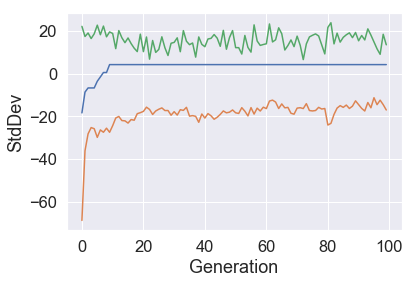

In [18]:
#Plotting Fitness
fitness_frame = pandas.read_csv(fitness_file, sep=" ")
sns.lineplot(x="Generation", y="Best_Fitness", data=fitness_frame)
sns.lineplot(x="Generation", y="Median_Fitness", data=fitness_frame)
sns.lineplot(x="Generation", y="StdDev", data=fitness_frame)

4989
    Ammunition    Health    Attack
0    -0.001436  0.121061 -0.101563
1    -0.156728  0.828027 -0.442733
2     0.194188  0.790485 -0.420193
3     0.233080  0.962317 -0.444795
4     0.289864  0.828558 -0.504885
5     0.160283  0.667991 -0.598927
6     0.072424  0.888723 -0.692328
7     0.323240  0.747798 -0.618647
8     0.256913  0.859977 -0.527493
9     0.302349  0.811452 -0.649207
10    0.354058  0.809056 -0.666078
11    0.468006  0.951965 -0.565181
12    0.387344  0.801330 -0.619489
13    0.453113  0.881560 -0.590127
14    0.451616  0.884417 -0.618243
15    0.486554  0.837264 -0.592342
16    0.432888  0.896654 -0.621013
17    0.586423  0.948811 -0.513368
18    0.582654  0.955646 -0.511618
19    0.716154  0.750533 -0.529381
20    0.699695  0.917913 -0.456886
21    0.673178  0.755811 -0.458114
22    0.730467  0.832290 -0.392034
23    0.671460  0.852650 -0.412082
24    0.577116  0.829199 -0.417455
25    0.667296  0.820521 -0.475221
26    0.620714  0.758887 -0.455170
27    0.681110 

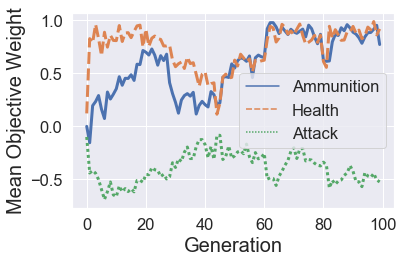

In [19]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

#Plotting NN outputs (that is, objective values) over generations.
nn_out_frame = pandas.read_csv(nn_output_file, sep=" ")#, header=0, names=["Ammo", "Health", "Frags"])
nn_out_frame.rename(columns={"Ammo": "Ammunition",
                              "Health": "Health",
                              "Frags": "Attack"}, inplace=True)
#print(nn_out_frame)
print(len(nn_out_frame))
summmary_nn_outputs=summarize_across_generations(nn_out_frame)
#summmary_nn_outputs.drop(summmary_nn_outputs.tail(1).index,inplace=True) # drop last n rows
#print(summmary_nn_outputs)
summmary_nn_outputs=summmary_nn_outputs.drop("Generation",1) #Dropping since is same as index
print(summmary_nn_outputs)
plt.xlabel("Generation", fontsize=20)
plt.ylabel("Mean Objective Weight", fontsize=20)
ax=sns.lineplot(data=summmary_nn_outputs, linewidth = 3)
fig=ax.get_figure()
fig.tight_layout()
fig.savefig("objectives_over_generations.pdf")


In [20]:
#Remember: 01-ammo, 02-health, 03-frags. 
#Quickly learns the 2 first are the most important.
#In other words: The problem is too simple - strategy does not need
#to depend on current state/measurements.

## Comparing fitnesses

In [29]:
#Hardcoded rules seems to give significantly higher fitnesses?
shy_fitness = pandas.read_csv(shy_rewards_file, names = ["Defensive"])
shy_fitness2 = pandas.read_csv(shy_rewards_file2, names = ["\nDefensive2"])
all_ones_fitness = pandas.read_csv(all_ones_reward_file, names = ["Aggressive"])


dynamic_manual_rules_fitnesses = pandas.read_csv(manual_obj_rewards_file, names = ["\nHardcoded"])
print(dynamic_manual_rules_fitnesses)

evolved_nn_fitnesses_frame = pandas.read_csv(evolved_objectives_file, names = ["Evolved"])
print(evolved_nn_fitnesses_frame)

    \nHardcoded
0    -38.311111
1    -38.837209
2    -36.765957
3    -25.414634
4    -27.309524
5    -24.268293
6    -23.500000
7    -22.947368
8    -43.021277
9    -39.469388
10   -34.568182
11   -28.674419
12   -40.500000
13   -36.023256
14   -25.307692
15   -33.186047
16   -40.395833
17   -31.390244
18   -35.377778
19   -33.355556
      Evolved
0  -14.358974
1  -12.756757
2  -22.853659
3   -9.222222
4  -12.416667
5  -20.750000
6   -9.828571
7  -12.805556
8  -16.564103
9  -12.459459
10 -12.378378
11 -15.135135
12 -17.243243
13 -20.611111
14 -17.128205
15 -17.513514
16 -11.783784
17  -4.823529
18 -23.650000
19 -22.000000


In [30]:
import scipy.stats as st
print("Shy vs Dynamic: ", st.mannwhitneyu(shy_fitness, dynamic_manual_rules_fitnesses))
print("Shy vs Evolved: ", st.mannwhitneyu(shy_fitness, evolved_nn_fitnesses_frame))
print("Dynamic vs Evolved: ", st.mannwhitneyu(dynamic_manual_rules_fitnesses, evolved_nn_fitnesses_frame))

Shy vs Dynamic:  MannwhitneyuResult(statistic=203.0, pvalue=0.0009862808982328683)
Shy vs Evolved:  MannwhitneyuResult(statistic=225.0, pvalue=0.0029989755444979624)
Dynamic vs Evolved:  MannwhitneyuResult(statistic=2.0, pvalue=4.586386355828241e-08)


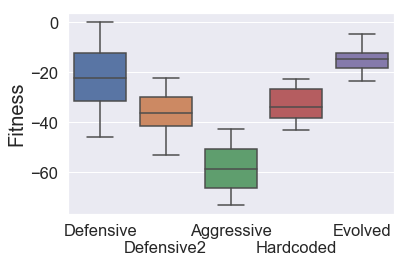

In [31]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
frames = [shy_fitness, shy_fitness2, all_ones_fitness, dynamic_manual_rules_fitnesses, evolved_nn_fitnesses_frame]
#print(evolved_nn_fitnesses_frame)
concatenated = pandas.concat(frames,sort=False)
plot=sns.boxplot(data=concatenated)
fig=plot.get_figure()
plt.ylabel("Fitness", fontsize=20)
fig.tight_layout()
fig.savefig('fitness_no_ammo.pdf', dpi=300)

In [10]:
#Shy has objective [1,1,-1]. Ones has objective [1,1,1].
#Evolved outperforms shy. That's interesting! It must have a different
#behavior, then? YES! A dynamic one!

## Analyzing behavior

In [35]:
import numpy as np
behavior_file = "../"+EXPERIMENT_SUBFOLDER+"/nn_behavior_measures_to_objectives.csv"
behavior_frame = pandas.read_csv(behavior_file, sep=" ")
behavior_frame.shape
behavior_frame.rename(columns={"m_ammo": "Current Ammunition",
                              "m_health": "Current Health",
                              "m_frags": "Monsters Killed",
                              "o_ammo":"Ammunition",
                              "o_health":"Health",
                              "o_frags":"Attack"}, inplace=True)
print(behavior_frame)

      Current Ammunition  Current Health  Monsters Killed  Ammunition  Health  \
0                    0.0             1.0         0.000000   -1.000000     1.0   
1                    0.0             1.0         2.631579   -1.000000     1.0   
2                    0.0             1.0         5.263158   -1.000000     1.0   
3                    0.0             1.0         7.894737   -1.000000     1.0   
4                    0.0             1.0        10.526316   -1.000000     1.0   
5                    0.0             1.0        13.157895   -1.000000     1.0   
6                    0.0             1.0        15.789474   -1.000000     1.0   
7                    0.0             1.0        18.421053   -1.000000     1.0   
8                    0.0             1.0        21.052632   -1.000000     1.0   
9                    0.0             1.0        23.684211   -1.000000     1.0   
10                   0.0             1.0        26.315789   -1.000000     1.0   
11                   0.0    

In [36]:
#Removing all rows where ammo!=0, since we always have 0 ammo here.
behavior_frame=behavior_frame[behavior_frame["Current Ammunition"] == 0.0]
behavior_frame.shape
print(behavior_frame)

     Current Ammunition  Current Health  Monsters Killed  Ammunition  Health  \
0                   0.0             1.0         0.000000   -1.000000     1.0   
1                   0.0             1.0         2.631579   -1.000000     1.0   
2                   0.0             1.0         5.263158   -1.000000     1.0   
3                   0.0             1.0         7.894737   -1.000000     1.0   
4                   0.0             1.0        10.526316   -1.000000     1.0   
5                   0.0             1.0        13.157895   -1.000000     1.0   
6                   0.0             1.0        15.789474   -1.000000     1.0   
7                   0.0             1.0        18.421053   -1.000000     1.0   
8                   0.0             1.0        21.052632   -1.000000     1.0   
9                   0.0             1.0        23.684211   -1.000000     1.0   
10                  0.0             1.0        26.315789   -1.000000     1.0   
11                  0.0             1.0 

In [37]:
#Method for summarizing and plotting averages for 1 measurement.
def summarize_measurement_and_plot_objectives(dataframe, main_objective):
    meas_to_objectives_array = []
    unique_main_measures = dataframe[main_objective].unique()
    for unique_measure in unique_main_measures:
        #All frames with given value for the column
        sub_frame=dataframe.loc[dataframe[main_objective] == unique_measure]
        objective_means = [sub_frame["Ammunition"].mean(), sub_frame["Health"].mean(),sub_frame["Attack"].mean()]
        meas_to_objectives_array.append([unique_measure,*objective_means])

    meas_to_objectives_array=np.array(meas_to_objectives_array)
    df = pandas.DataFrame(meas_to_objectives_array, columns=[main_objective, 'Ammunition', 'Health', 'Attack'])
    ax=df.plot(x=main_objective, y=['Ammunition', 'Health', 'Attack'], linewidth=5)
    fig=ax.get_figure()
    plt.ylabel("Objective Weight", fontsize=20)
    fig.tight_layout()
    fig.savefig(main_objective.replace(" ","")+".pdf")


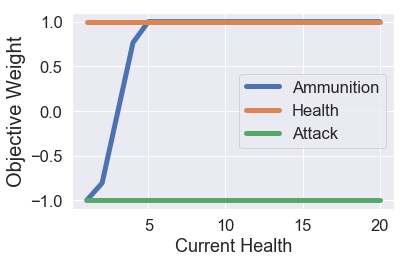

In [39]:
summarize_measurement_and_plot_objectives(behavior_frame, 'Current Health')
#We basically learned the very simple rule that we should always seek
#ammo+health, but if health gets really low, we should seek only health.

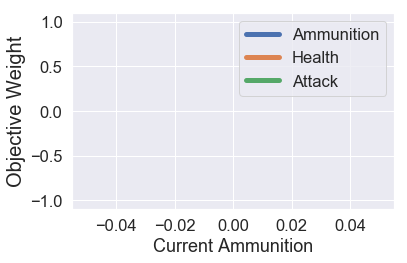

In [40]:
summarize_measurement_and_plot_objectives(behavior_frame, 'Current Ammunition')

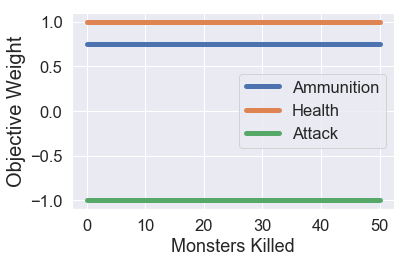

In [41]:
summarize_measurement_and_plot_objectives(behavior_frame, 'Monsters Killed')